In [1]:
import pandas as pd
import numpy as np

In [2]:
file=pd.DataFrame()
for i in range(10):
    f1=pd.read_csv('/home/yazi/Documents/stage/data/car_afc_train/train'+str(i)+'_first.csv',delimiter=';',encoding='iso 8859-1',dtype=str)
    f2=pd.read_csv('/home/yazi/Documents/stage/data/car_afc_train/train'+str(i)+'_last.csv',delimiter=';',encoding='iso 8859-1',dtype=str)
    file=pd.concat([f1,f2,file],ignore_index=True)

In [3]:
data1_true=pd.read_csv('/home/yazi/Documents/stage/d
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objectata/data1_true.csv',delimiter=';',encoding='iso 8859-1')
data2_true=pd.read_csv('/home/yazi/Documents/stage/data/data2_true.csv',delimiter=';',encoding='iso 8859-1')
data1_false=pd.read_csv('/home/yazi/Documents/stage/data/data1_false_without_bus.csv',delimiter=';',encoding='iso 8859-1')
data2_false=pd.read_csv('/home/yazi/Documents/stage/data/data2_false_without_bus.csv',delimiter=';',encoding='iso 8859-1')

In [4]:
(len(data1_true)+len(data2_true))/(len(data1_true)+len(data2_true)+len(data1_false)+len(data2_false))

0.07721254355400697

In [5]:
Data_Train=pd.concat([data1_true,data2_true,data1_false,data2_false],ignore_index=True)
Data_Train

,Ot,Dt,DUREE,NBTRAJTC,dist,parking
0,18300.0,19800.0,1500.0,1.0,20362.956563,1
1,34200.0,35340.0,1140.0,1.0,1941.648784,1
2,36000.0,37800.0,1800.0,2.0,23648.467181,1
3,27000.0,31800.0,4800.0,3.0,35474.638828,1
4,27000.0,32400.0,5400.0,3.0,35713.582850,1
5,30000.0,32400.0,2400.0,1.0,13400.000000,1
6,27900.0,33600.0,5700.0,3.0,32614.260685,1
7,48600.0,51300.0,2700.0,1.0,16319.620094,1
8,19800.0,22500.0,2700.0,1.0,19009.471324,1
9,30000.0,30300.0,300.0,2.0,100.000000,1


# XGBoost

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

In [7]:
X = Data_Train.drop('parking', axis=1)
y = Data_Train['parking']

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.65386988, -1.71292649, -0.43567426, -0.90705917,  0.911556  ],
       [-0.85767857, -0.92827559, -0.61707703, -0.90705917, -0.57991072],
       [-0.76754371, -0.80406445, -0.28450528,  0.35715014,  1.17756479],
       ...,
       [ 0.6295467 ,  0.77129643,  1.37835347,  0.35715014,  2.23819619],
       [ 1.41071553,  1.45294297,  0.32017063,  0.35715014,  2.22060672],
       [ 1.66609765,  1.64986308, -0.28450528, -0.90705917, -0.26543309]])

In [9]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14345    0
14346    0
14347    0
14348    0
14349    0
Name: parking, Length: 14350, dtype: int64

# Part1

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tries in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)

In [12]:
csv.fit(X_train, y_train)

/home/yazi/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.2, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True,

In [13]:
csv.best_params_

{'max_depth': 6, 'min_child_weight': 1}

In [13]:
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight':1}

In [14]:
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_train, y_train)
csv.scorer_ 
csv.best_params_

{'max_delta_step': 0, 'subsample': 0.8}

In [15]:
csv.cv_results_ 

{'mean_fit_time': array([0.57158151, 0.54783096, 0.51292682, 0.59828658, 0.57470522,
        0.53814254, 0.60139685, 0.58162155, 0.54331789, 0.60012264,
        0.57918634, 0.54453993]),
 'std_fit_time': array([0.0045308 , 0.00158391, 0.00653451, 0.00795756, 0.00197436,
        0.00366227, 0.0013643 , 0.00298792, 0.00418226, 0.003039  ,
        0.00218235, 0.00548249]),
 'mean_score_time': array([0.01322751, 0.0131289 , 0.0131402 , 0.01291556, 0.01273422,
        0.01256771, 0.01343527, 0.01317501, 0.01309457, 0.01343622,
        0.01309171, 0.0132566 ]),
 'std_score_time': array([2.05906070e-04, 4.74620914e-05, 3.79312106e-04, 1.48633087e-04,
        1.73535671e-04, 2.45838177e-04, 1.25378126e-04, 9.86890503e-05,
        2.00639659e-04, 1.20432736e-04, 1.09754055e-04, 2.32268275e-04]),
 'param_max_delta_step': masked_array(data=[0, 0, 0, 1, 1, 1, 2, 2, 2, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, Fals

In [16]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}
fix_params['max_delta_step'] = 0
fix_params['subsample'] = 0.8

In [17]:
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_train, y_train)
csv.best_params_

{'learning_rate': 0.3}

In [18]:
fix_params['learning_rate'] = 0.3
params_final =  fix_params
print(params_final)

{'learning_rate': 0.3, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight': 1, 'max_delta_step': 0, 'subsample': 0.8}


In [19]:
xgdmat_train = xgb.DMatrix(X_train, y_train)
xgdmat_test = xgb.DMatrix(X_test, y_test)
xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)

/home/yazi/anaconda3/envs/tf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


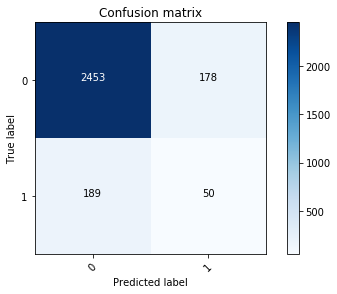

Precision =     0.219
Recall (TPR) =  0.209
Fallout (FPR) = 6.765e-02


In [23]:
y_pred = xgb_final.predict(xgdmat_test)
thresh = 0.3
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

# Part2

In [94]:
len(X)

14350

In [95]:
import collections

In [96]:
collections.Counter(y)

Counter({1: 1108, 0: 13242})

In [97]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X,y)

In [98]:
collections.Counter(y_res)

Counter({1: 13242, 0: 13242})

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2)

In [100]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tries in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)

In [101]:
csv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.2, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True,

In [102]:
csv.best_params_

{'max_depth': 6, 'min_child_weight': 1}

In [103]:
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight':1}

In [104]:
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_train, y_train)
csv.best_params_

{'max_delta_step': 0, 'subsample': 1}

In [105]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}
fix_params['max_delta_step'] = 0
fix_params['subsample'] = 1

In [106]:
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_train, y_train)
csv.best_params_

{'learning_rate': 0.3}

In [107]:
fix_params['learning_rate'] = 0.3
params_final =  fix_params
print(params_final)

{'learning_rate': 0.3, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight': 1, 'max_delta_step': 0, 'subsample': 1}


In [108]:
xgdmat_train = xgb.DMatrix(X_train, y_train)
xgdmat_test = xgb.DMatrix(X_test, y_test)
xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)

In [109]:
print(params_final)

{'learning_rate': 0.3, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight': 1, 'max_delta_step': 0, 'subsample': 1}


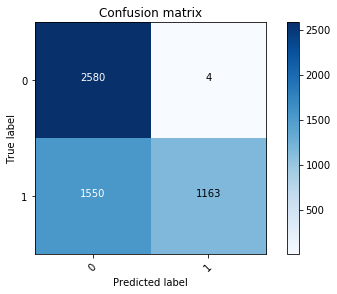

Precision =     0.997
Recall (TPR) =  0.429
Fallout (FPR) = 1.548e-03


In [177]:
y_pred = xgb_final.predict(xgdmat_test)
thresh = 0.95
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

In [178]:
from sklearn.metrics import classification_report, confusion_matrix
def show_result(y_test,y_pred):
    y_test=np.squeeze(y_test)
    y_pred=np.squeeze(y_pred)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [179]:
y_pred

array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

In [180]:
y_test

array([0, 0, 1, ..., 1, 1, 1])

In [181]:
show_result(y_test,y_pred)

[[2580    4]
 [1550 1163]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      2584
           1       1.00      0.43      0.60      2713

    accuracy                           0.71      5297
   macro avg       0.81      0.71      0.68      5297
weighted avg       0.82      0.71      0.68      5297



# test normal sample

In [182]:
X0_test = xgb.DMatrix(X)

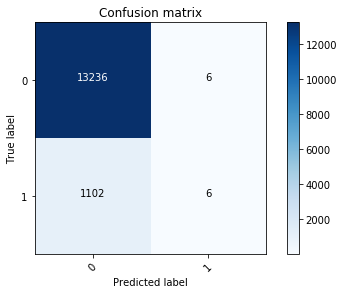

Precision =     0.500
Recall (TPR) =  0.005
Fallout (FPR) = 4.531e-04


In [183]:
y_pred = xgb_final.predict(X0_test)
thresh = 0.95
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

# Prediction on AFC

In [184]:
scaler = StandardScaler()
X0 = scaler.fit_transform(file)
X0

array([[-1.10165604, -1.21512452, -0.17738113,  0.85520398, -0.11471561],
       [-0.12573111,  1.1976657 ,  2.8932032 ,  3.28815296,  0.73442831],
       [-1.09977777,  0.47995172,  3.51393893,  0.85520398, -0.38551987],
       ...,
       [ 0.7737926 ,  0.67654986, -0.26117054,  0.24696674,  2.43363096],
       [ 0.78528316,  0.68837531, -0.26117054,  0.24696674,  2.43363096],
       [ 0.74142013,  0.64323392, -0.26117054,  0.24696674,  2.43363096]])

In [185]:
X0_final = xgb.DMatrix(X0)

In [186]:
X0_final

In [187]:
y_pred = xgb_final.predict(X0_final)

In [188]:
y_pred

array([0.8518214 , 0.23026095, 0.06554617, ..., 0.95001495, 0.9668443 ,
       0.96457857], dtype=float32)

In [189]:
thresh=0.95
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0

In [190]:
collections.Counter(y_pred)

Counter({0.0: 315856, 1.0: 29854})

In [193]:
29854/(315856+29854)

0.08635561597871048